In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv("full.csv")
#data.head()

In [3]:
#submit = pd.read_csv("test.csv")
#submit.head()

In [4]:
lb = LabelEncoder()
data['Embarked'] = lb.fit_transform(data['Embarked'].astype(str))
data['Sex'] = lb.fit_transform(data['Sex'].astype(str))
data['Cabin'] = lb.fit_transform(data['Cabin'].astype(str))
data = data.fillna(data.median())

In [5]:
full_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Class', 'Embarked']]
full_sur = data[['Survived']]
#target

In [6]:
train, test, train_sur, test_sur = train_test_split(full_data, full_sur, train_size=0.70, test_size=0.30)


In [15]:
#target1 = submit[['Survived']]


In [8]:
#from sklearn.metrics import accuracy_score
#decisiontree = DecisionTreeClassifier(max_depth=10, random_state = 10)
#decisiontree = decisiontree.fit(train, train_sur)
#plot_tree(decisiontree)
#cross_val_score(decisiontree, train, train_sur, cv=30).mean()
#decisiontree.score(test, test_sur)

#print(accuracy_score(test_sur, decisiontree.predict(test)))

In [9]:
#decisiontree1 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, random_state = 100)
#decisiontree1 = decisiontree1.fit(train, train_sur)
#plot_tree(decisiontree1)
#cross_val_score(decisiontree1, train, train_sur, cv=30).mean()
#decisiontree1.score(test, test_sur)


In [14]:
type(range(10))

range

In [10]:
decisiontree = DecisionTreeClassifier()
tree_params = {'max_depth': range(1,30),
'max_leaf_nodes': range(2,30)}
decisiontree_grid = GridSearchCV(decisiontree, tree_params, cv=5)
decisiontree_grid.fit(train, train_sur)
print(decisiontree_grid.best_params_)
print(decisiontree_grid.best_score_)
print(decisiontree_grid.best_estimator_ )

{'max_depth': 2, 'max_leaf_nodes': 3}
0.8056768558951966
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


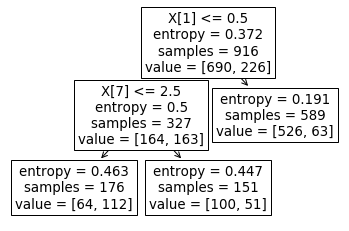

In [11]:
plot_tree(decisiontree_grid.best_estimator_)
plt.show()

In [12]:
print(decisiontree_grid.predict(test))
decisiontree_grid.score(test, test_sur)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

0.7684478371501272